In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('seaborn')

In [2]:
filename = os.path.join(
    os.getcwd(), 
    'data', 
    '2020-11-20',
    'rdf_file_T_',
)

In [3]:
temperatures = (
    2.81660, 2.38821, 2.00796, 1.60098, 1.20017, 0.80224, 0.40089, 0.00010,
)

In [4]:
rdf_data = pd.DataFrame(columns=['radius'])

for temperature in temperatures:
    df = pd.read_csv(
        f'{filename}{temperature:.5f}.csv',
        sep=';',
    )
    rdf_data = rdf_data.merge(
        right=df,
        how='outer',
        on='radius',
    )
    rdf_data = rdf_data.rename(columns={'rdf': f'{temperature:.5f}'})
    
# rdf_data

,radius,2.81660,2.38821,2.00796,1.60098,1.20017,0.80224,0.40089,0.00010
0,0.005,5.855646e+08,5.855646e+08,5.855646e+08,5.855646e+08,5.855646e+08,5.855646e+08,5.855646e+08,5.855646e+08
1,0.015,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.025,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0.035,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.045,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...
608,6.085,9.994623e-01,1.000256e+00,1.000309e+00,9.995039e-01,1.002164e+00,1.001986e+00,9.849849e-01,9.539211e-01
609,6.095,9.993107e-01,9.992572e-01,1.000111e+00,1.000140e+00,1.001012e+00,9.995078e-01,9.832913e-01,9.765792e-01
610,6.105,1.000216e+00,9.980709e-01,1.001368e+00,9.998670e-01,1.002773e+00,1.002580e+00,9.815768e-01,9.393089e-01
611,6.115,1.000333e+00,9.979366e-01,1.002109e+00,1.001586e+00,1.002252e+00,1.002299e+00,9.812084e-01,9.597330e-01


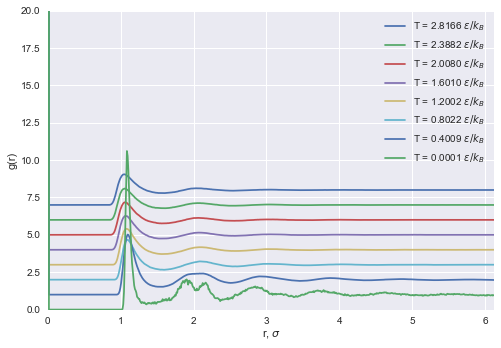

In [5]:
for i, temperature in enumerate(temperatures):
    plt.plot(
        rdf_data['radius'], 
        rdf_data[f'{temperature:.5f}'] + 1 * (len(temperatures) - (i + 1)), 
        label=f'T = {temperature:.4f} $\epsilon / k_B $',
    );
    
plt.xlabel('r, $\sigma$');
plt.ylabel('g(r)');
plt.xlim(left=0, right=6.125);
plt.ylim(bottom=0, top=20);
plt.legend();